In [1]:
from dataset import ImageNetDataset

from transformers import CLIPTokenizer

In [2]:
clip_tokenizer = CLIPTokenizer.from_pretrained(
    "CompVis/stable-diffusion-v1-4",
    subfolder="tokenizer",
)

In [3]:
dataset = ImageNetDataset(
    debug=True,
    text_transform=lambda x: x,
    clip_tokenizer=clip_tokenizer,
    simple_prompt=True
)

print("Loaded {} images".format(len(dataset)))

Loaded 50000 images


In [4]:
import torch
from lavis.models import load_model_and_preprocess
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [5]:
model, vis_processors, _ = load_model_and_preprocess(name="blip_caption", model_type="large_coco", is_eval=True, device=device)

In [6]:
import random

In [7]:
# get a random sample from the dataset
idx = random.randint(0, len(dataset))
sample = dataset[idx]

print(idx)
print(sample.keys())
print(sample["class_name"])

4600
dict_keys(['image', 'image_path', 'label', 'text_input', 'image_id', 'instance_id', 'prompt', 'class_name', 'ctx_begin_pos', 'ctx_c_begin_pos', 'instance_prompt_ids', 'mask'])
bee eater, coraciiform bird


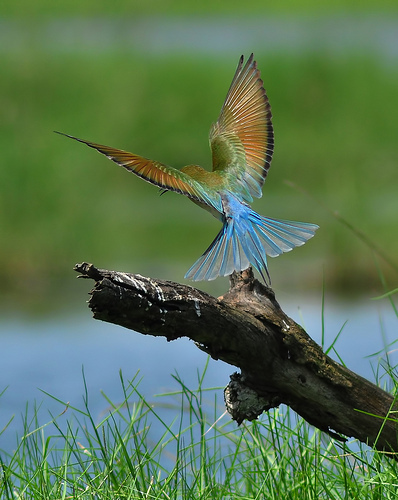

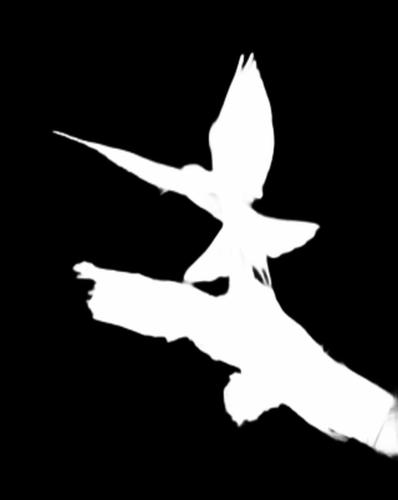

In [8]:
display(sample["image"])
display(sample["mask"])

In [13]:
image = vis_processors["eval"](sample["image"]).unsqueeze(0).to(device)
prompt = ["a {}".format(sample["class_name"].split(",")[0]), "a {}".format(sample["class_name"].split(",")[0]), ]

In [14]:
model.generate({"image": torch.concat([image, image]), "prompt": prompt}, use_nucleus_sampling=False)

['a bee eaterer taking off from a branch in the grass',
 'a bee eaterer taking off from a branch in the grass']